# **Algorithms Homework 1**
**BMI 2005: Dr. Costa**

**Helena Belloff**

**3/10/2020**

_________________

** Question 1  **

Part A

In [478]:
'Naive lennard, with distance = r, epsilon e = 1, and sigma s = 1'

def naive_lennard_jones_potential(r, e = 1, s = 1): 
    return 4 * e * ((s / r)**12 - (s / r)**6)
    

Part B

LJPOTENTIAL(r, σ, ε)
1. r^2 ← r * r
2. σ^2 ← σ * σ
3. z ← σ^2 / r^2
4. u ← z^3
5. return( -4εu(1 - u) )

In [479]:
'Starting:'
'V_ij = -4 * e * u * (1 - u)'

'Then substitute u for z**3:'
'V_ij = -4 * e * z**3 * (1 - z**3)'

'Then substitue z for s**2 (for sigma) / r **2'
'V_ij = -4 * e * (s**2 / r**2)**3 * (1 - (s**2 / r**2)**3)'

'Then distribute'
'V_ij = -4 * e * (s**6/r**6) * (1 - (s**6/r**6))'

'Keep distributing'
'V_ij = -4 * e * ((s**6/r**6) - (s**12/r**12))'

'This is the same as:'
'V_ij = 4 * e * (-(s**6/r**6) + (s**12/r**12))'

'Which is the same as:'
'V_ij = 4 * e * ((s**12/r**12) - (s**6/r**6))'

'Now we can further simplify'
'V_ij = 4 * e * ((s/r)**12 - (s/r)**6)'


'V_ij = 4 * e * ((s/r)**12 - (s/r)**6)'

Part C

In [480]:
def efficient_lennard_jones_potential(r, e, s):
    r2  = r**2
    s2 = s**2
    z = s2 / r2
    u = z**3
    return -4 * s * u * (1 - u)

Both algorithms have O(1) runtime. 
However, while both algorithms run in constant time, the efficient_lennard_jones_potential algorithm is more efficient than the naive_lennard_jones_potential algorithm because the efficient algorithm has less steps.

For example, the naive algorithm:
1. s / r
2. (s / r)^12
3. (s / r)^6
4. (s / r)^12 - (s / r)^6
5. 4 * e
6. 4 * e * (s / r)^12 - (s / r)^6

The efficient algorithm: 
1. r2  = r^2
2. s2 = s^2
3. z = s2 / r2
4. u = z^3


Part D

In [481]:
import time

# Naive Algorithm for r = 10
r = 2.1
init = time.clock()
naive_lennard_jones_potential(r, e = 1, s = 1)
fin = time.clock()
time_in_sec = fin - init
print("Time for Naive Algorithm: ", time_in_sec)


Time for Naive Algorithm:  4.899999998997373e-05


In [482]:
import time

r = 2.1
e = 1
s = 1
# Efficient Algorithm
init = time.clock()
efficient_lennard_jones_potential(r, e, s)
fin = time.clock()
time_in_sec = fin - init
print("Time for Efficient Algorithm: ", time_in_sec)


Time for Efficient Algorithm:  4.500000000007276e-05


Based on an r input of 2.1 (chosen at random), you can see that the efficient algorithm runs faster than the naive algorithm. The efficient algorithm has less steps (4 steps) and the naive algorithm has more steps (6 steps). The efficient algorithm calculates all of the variables in the equation before returning the total equation value while the naive algorithm calculates the variables and returns the equation in one step. This could be a reason why the efficient algorithm runs faster.

_________________

** Question 2  **

Part A

In [483]:
import numpy as np
import re


def xyz_file(filename):
    # Open file
    with open(filename, 'r') as f:
        num_of_atoms = None
        comment = None
        output = []
        for line in f:
            if num_of_atoms == None:
                num_of_atoms = int(line)
            elif comment == None:
                comment = line
            else:
                split_l = re.split('\s|(?<!\d)[,.](?!\d)', line)
                float_filter = re.compile(r'^-?\d+(?:\.\d*)') 
                fl = [a for a in split_l if float_filter.match(a)] 
                while("" in fl) : 
                    fl.remove("")
                output.append(fl)
        output = np.array(output, dtype = 'float')
        return output

# I am fully acknowledging that using regular expressions is horrible, but Python always has issues with 
# floats and this was a fun challenge! 

Part B

In [484]:
test3file = '/Users/helenabelloff/Downloads/lj-0003.xyz'
test3 = xyz_file(test3file)
print("File for 3 atoms:")
print(test3)

File for 3 atoms:
[[ 0.53913567 -0.51850799  0.07937232]
 [ 0.11065883  0.48501761 -0.49567643]
 [-0.4635602   0.05370848  0.50985172]]


In [485]:
test200file = '/Users/helenabelloff/Downloads/lj-0200.xyz'
test200 = xyz_file(test200file)
print("File for 200 atoms:")
print(test200)

File for 200 atoms:
[[-3.657420e-01 -1.434236e+00  1.086713e+00]
 [ 1.758085e+00 -2.733505e+00 -4.553970e-01]
 [-2.777260e+00  8.659730e-01 -9.788090e-01]
 [-8.509290e-01  8.053680e-01 -1.050607e+00]
 [ 4.697280e-01 -1.262455e+00  1.770134e+00]
 [ 1.776954e+00  2.284919e+00  2.691217e+00]
 [ 1.564369e+00  2.100387e+00 -3.898060e-01]
 [ 2.153646e+00  1.233546e+00  1.145661e+00]
 [ 2.373994e+00  2.372510e+00  1.522204e+00]
 [-3.883020e-01 -2.295452e+00 -2.280274e+00]
 [ 3.075270e-01 -2.482761e+00  3.009565e+00]
 [-2.300226e+00  1.953750e-01 -2.845240e+00]
 [ 1.437510e-01  2.302608e+00 -1.036652e+00]
 [-8.150650e-01  2.285127e+00  2.228309e+00]
 [-5.325050e-01 -2.077966e+00 -2.126230e-01]
 [-2.505161e+00 -2.032122e+00  3.956170e-01]
 [ 2.298553e+00 -1.556703e+00  7.257640e-01]
 [-9.271460e-01  1.175015e+00 -2.089625e+00]
 [-1.088581e+00 -2.306500e+00 -1.239712e+00]
 [-8.483660e-01 -2.593442e+00  5.815430e-01]
 [-4.684690e-01  4.355200e-01  2.547586e+00]
 [-1.573523e+00 -2.927182e+00 -5.03

In [486]:
test500file = '/Users/helenabelloff/Downloads/lj-0500.xyz'
test500 = xyz_file(test500file)
print("File for 500 atoms:")
print(test500)

File for 500 atoms:
[[-0.448824  0.154664 -0.111682]
 [-0.343292  0.251982  0.908185]
 [-0.061432 -0.713214  0.44626 ]
 ...
 [-0.418216 -3.160866 -3.093508]
 [-3.495829 -0.822057 -3.114033]
 [ 1.717514  2.747489 -3.091613]]


In [487]:
test1000file = '/Users/helenabelloff/Downloads/lj-1000.xyz'
test1000 = xyz_file(test1000file)
print("File for 1000 atoms:")
print(test1000)

File for 1000 atoms:
[[ 0.516613  0.019724  1.204809]
 [ 0.69019  -0.9218    0.658039]
 [-0.29502  -0.500291  0.760023]
 ...
 [-4.022963 -1.797735 -3.736121]
 [-2.724171  3.646723 -3.741703]
 [-4.660764 -0.889811 -3.721657]]


_________________

**Question 3**

Part A

In [488]:
def pairwise_potential_energy(n):
    # (n * (n-1)) / 2
    # (n^2 - n) / 2
    return int((n**2 - n) / 2)

print("Number of pairwise potential energy calculations required for 3 atoms: ", pairwise_potential_energy(3))
print("Number of pairwise potential energy calculations required for 200 atoms: ", pairwise_potential_energy(200))
print("Number of pairwise potential energy calculations required for 500 atoms: ", pairwise_potential_energy(500))
print("Number of pairwise potential energy calculations required for 1000 atoms: ", pairwise_potential_energy(1000))

Number of pairwise potential energy calculations required for 3 atoms:  3
Number of pairwise potential energy calculations required for 200 atoms:  19900
Number of pairwise potential energy calculations required for 500 atoms:  124750
Number of pairwise potential energy calculations required for 1000 atoms:  499500


Part B

In [489]:
import math

# Function that calculates Euclidean Distance between atom pairs
def distance_bet_atom_pairs(i,j):
    #2D space so we have our formula:
    return math.sqrt((j[0]-i[0])**2 + (j[1]-i[1])**2 + (j[2]-i[2])**2)

e = 1
s = 1
# Function that caclulates total potential energy in a system
def total_potential_energy(filename):
    total = 0
    for i in range(0, len(filename)):
        first_row = filename[i,:]
        for a in range(i+1, len(filename)):
            second_row = filename[a,:]
            r = distance_bet_atom_pairs(first_row, second_row)
            total += efficient_lennard_jones_potential(r,e,s)
    return total

print("Total potential energy for 3-atom case: ", total_potential_energy(test3))
print("Total potential energy for 200-atom case: ", total_potential_energy(test200))
print("Total potential energy for 500-atom case: ", total_potential_energy(test500))
print("Total potential energy for 1000-atom case: ", total_potential_energy(test1000))

Total potential energy for 3-atom case:  -2.437910531303559
Total potential energy for 200-atom case:  -799.6247671902994
Total potential energy for 500-atom case:  -3315.986631056259
Total potential energy for 1000-atom case:  -7017.923501577738


_________________

**Question 4**

Part A

In [490]:
e = 1
s = 1

def cut_test(filename, rcut=1):
    total = 0
    for i in range(0, len(filename)):
        first_row = filename[i,:]
        for a in range(i+1, len(filename)):
            second_row = filename[a,:]
            r = distance_bet_atom_pairs(first_row, second_row)
            if r <= rcut:
                total += efficient_lennard_jones_potential(r,e,s)
    return total

print("Total potential energy for 3-atom case with cut: ", cut_test(test3))
print("Total potential energy for 200-atom case with cut: ", cut_test(test200))
print("Total potential energy for 500-atom case with cut: ", cut_test(test500))
print("Total potential energy for 1000-atom case with cut: ", cut_test(test1000))

Total potential energy for 3-atom case with cut:  0
Total potential energy for 200-atom case with cut:  37.83058699166228
Total potential energy for 500-atom case with cut:  30.564359625240737
Total potential energy for 1000-atom case with cut:  58.507225923230536


**Conclusion:**

This is a bad cut off because all of the values are supposed to have negative potential energy and these totals are not even close to the true totals. 

Part B

[[ 5.00000000e-01  0.00000000e+00]
 [ 6.00000000e-01  0.00000000e+00]
 [ 7.00000000e-01  0.00000000e+00]
 [ 8.00000000e-01  0.00000000e+00]
 [ 9.00000000e-01  0.00000000e+00]
 [ 1.00000000e+00  5.85072259e+01]
 [ 1.10000000e+00 -2.30651268e+03]
 [ 1.20000000e+00 -4.99510245e+03]
 [ 1.30000000e+00 -5.00017219e+03]
 [ 1.40000000e+00 -5.00117000e+03]
 [ 1.50000000e+00 -5.02509210e+03]
 [ 1.60000000e+00 -5.62719699e+03]
 [ 1.70000000e+00 -5.63182512e+03]
 [ 1.80000000e+00 -5.68275245e+03]
 [ 1.90000000e+00 -6.03393778e+03]
 [ 2.00000000e+00 -6.35897392e+03]
 [ 2.10000000e+00 -6.40846427e+03]
 [ 2.20000000e+00 -6.55119595e+03]
 [ 2.30000000e+00 -6.60106702e+03]
 [ 2.40000000e+00 -6.60834952e+03]
 [ 2.50000000e+00 -6.70416232e+03]
 [ 2.60000000e+00 -6.72170504e+03]
 [ 2.70000000e+00 -6.75101089e+03]
 [ 2.80000000e+00 -6.78315064e+03]
 [ 2.90000000e+00 -6.82825640e+03]
 [ 3.00000000e+00 -6.86793545e+03]
 [ 3.10000000e+00 -6.87546447e+03]
 [ 3.20000000e+00 -6.88973329e+03]
 [ 3.30000000e+00 -6

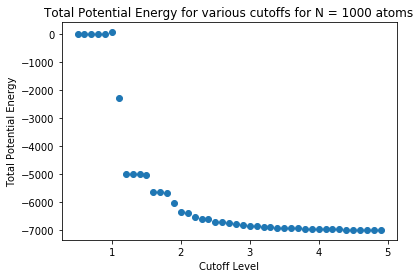

In [491]:
import numpy as np
import matplotlib.pyplot as plt

#0.5 < rcut < 5.0 in increments of 0.1 for the system of N = 1000 atoms. 
cut_and_result = []
for cut in np.arange(0.5, 5, 0.1): # QUESTION: Why does Python hate floats?
    result = (cut, cut_test(test1000, rcut = cut))
    cut_and_result.append(result)
cut_and_result = np.array(cut_and_result)
print(cut_and_result)

cut_level = cut_and_result[:,0] # First column, cut off levels
cut_result = cut_and_result[:,1] # Second column, the outputs at those levels

plt.scatter(cut_level, cut_result)
plt.title("Total Potential Energy for various cutoffs for N = 1000 atoms")
plt.xlabel("Cutoff Level")
plt.ylabel("Total Potential Energy")
plt.show()

So, we want to choose a cut off that allows us to capture as much of the original total potential energy in the system (which we determined was -7017.923501577738). I would choose a cut off that is at least 99% of the original total potential energy. So -7017.923501577738*(.99) = 6947.74426656196062. The cut off level that gets us closest to that output is 3.7. 

Part C

Time for naive algorithm for 3 atoms:  8.200000002034358e-05
Time for naive algorithm for 200 atoms:  0.07199100000002545
Time for naive algorithm for 500 atoms:  0.26319100000000617
Time for naive algorithm for 3 atoms:  0.9835920000000442
Time for Cut Algorithm for 3 atoms:  4.899999998997373e-05
Time for Cut Algorithm for 200 atoms:  0.034484999999904176
Time for Cut Algorithm for 500 atoms:  0.1973160000000007
Time for Cut Algorithm for 1000 atoms:  0.8050849999999627


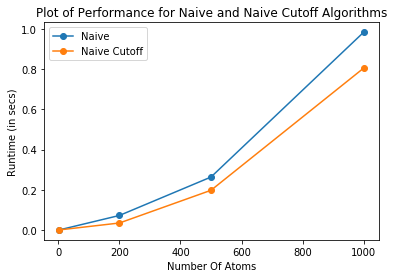

In [492]:
import time
import matplotlib.pyplot as plt

chosen_cut = 3.7

init3 = time.clock()
total_potential_energy(test3)
fin3 = time.clock()
time_in_sec3 = fin3 - init3
print("Time for naive algorithm for 3 atoms: ", time_in_sec3)

init200 = time.clock()
total_potential_energy(test200)
fin200 = time.clock()
time_in_sec200 = fin200 - init200
print("Time for naive algorithm for 200 atoms: ", time_in_sec200)

init500 = time.clock()
total_potential_energy(test500)
fin500 = time.clock()
time_in_sec500 = fin500 - init500
print("Time for naive algorithm for 500 atoms: ", time_in_sec500)

init1000 = time.clock()
total_potential_energy(test1000)
fin1000 = time.clock()
time_in_sec1000 = fin1000 - init1000
print("Time for naive algorithm for 3 atoms: ", time_in_sec1000)

#______________ Cut test ________________

initCut3 = time.clock()
cut_test(test3, chosen_cut)
finCut3 = time.clock()
time_in_sec_cut3 = finCut3 - initCut3
print("Time for Cut Algorithm for 3 atoms: ", time_in_sec_cut3)

initCut200 = time.clock()
cut_test(test200, chosen_cut)
finCut200 = time.clock()
time_in_sec_cut200 = finCut200 - initCut200
print("Time for Cut Algorithm for 200 atoms: ", time_in_sec_cut200)

initCut500 = time.clock()
cut_test(test500, chosen_cut)
finCut500 = time.clock()
time_in_sec_cut500 = finCut500 - initCut500
print("Time for Cut Algorithm for 500 atoms: ", time_in_sec_cut500)

initCut1000 = time.clock()
cut_test(test1000, chosen_cut)
finCut1000 = time.clock()
time_in_sec_cut1000 = finCut1000 - initCut1000
print("Time for Cut Algorithm for 1000 atoms: ", time_in_sec_cut1000)

# Plotting

plt.plot([3,200,500,1000],[time_in_sec3, time_in_sec200, time_in_sec500, time_in_sec1000], marker='o')
plt.plot([3,200,500,1000],[time_in_sec_cut3, time_in_sec_cut200, time_in_sec_cut500, time_in_sec_cut1000], marker='o')
plt.title("Plot of Performance for Naive and Naive Cutoff Algorithms")
plt.xlabel("Number Of Atoms")
plt.ylabel("Runtime (in secs)")
plt.legend(["Naive","Naive Cutoff"])
plt.show()


This cut off does slightly reduce the cut algorithm runtimes. However, we have not solved the N^2 scaling problem because we're still calculating the distance between atom pairs, which is still N^2.

_________________

**Question 5**

1. N + 1
--> N

2. 1 + 1/N
--> 1

3. (1 + 1/N)(1 + 2/N)
-->  1

4. 2N^3 - 15N^2 + N
--> 2N^3

5. log(2N)/log(N)
--> 1

6. log(N^2+1)/log(N)
--> 2

7. N^100/2^N
--> 1


_________________

**Question 6**

Part A

In [ ]:
def problem_a(n)
    sum = 0
    k = n
    while k > 0:
        for i in range(k):
            sum += 1
        k = k // 2
    return sum

This program is O(N)

Part B

In [ ]:
def problem_b(n):
    sum = 0
    i = 1 
    while i < n:
        for j in range(i):
            sum += 1        
        i = i * 2
    return sum

This program is O(N)

Part C

In [ ]:
def problem_c(n):
    sum = 0
    i = 1 
    while i < n:
        for j in range(n):
            sum += 1        
        i = i * 2
    return sum 

This program is O(NlogN)

_________________

**Question 7**

For a problem of size N0, it takes T0 time
1. F(N0) = T0 (we really get 2^(b((N0/N0)-1))* T0 which is T0)

Now if we double by a factor of 2^b, N0 becomes twice as large as N0
2. F(2 * N0) = 2^(b((2N0/N0)-1))* T0

Which becomes
3. F(N0) = 2^b(2-1)* T0

Finally,
4. F(N0) = 2^b * T0

Therefore 2^b is the factor by which the equation will go up when N is doubled

So we have our formula:

F(N) = 2^(b((N/N0)-1)) * T0

_________________

**Question 8**

Part A

In [494]:
#BETTERCHANGE(M, c, d)
#1 r ← M
#2 for k ← 1 to d
#3   ik ← r/ck
#4   r ← r - ck * ik
#5 return (i1, i2, …, id)

# d = # of denominations
# c = vector of the denomination values
# M = float (or remainder, r)

def betterChange(M, c, d):
    # Remainder of the money
    r = M
    # Creating an array, i, to keep track
    i = []
    for k in range(0,d):
        # We need two // because we don't want the floats
        i.append(r // c[k])
        r = r - c[k] * i[k]
    return i


Part B

In [495]:
# with M = 79, c = [9, 3, 1], and d = 3.

better1 = betterChange(.79, [.09, .03, .01], 3)
print(better1)

[8.0, 2.0, 1.0]


Part C

The runtime of betterChange is d because the program loops through a vector of denomination values (c). The length of this vector is determined by the length of d.

Part D

In [496]:
betterCorrect = betterChange(.79, [.09, .03, .01], 3)
print(betterCorrect)

[8.0, 2.0, 1.0]


Part E

In [497]:
betterIncorrect = betterChange(.47, [.05, .10, .25], 3)
print(betterIncorrect)

[9.0, 0.0, 0.0]


_________________

**Question 9**

Part A

In [498]:
# Harmonic Numbers are 1, 1/2, 1/3, 1/4, 1/5, ...., 1/n ~ ln(n)

import numpy as np

def harmonic(n):
    har = []
    for i in range(1, n+1): 
        har.append(1/i)
    return sum(har) 

Part B

In [499]:
import numpy as np
import random

def coupon(n):
    generated_values = []
    count = 0
    while True:
        newnum = np.random.randint(low = 0, high = n)
        if newnum in generated_values:
            break
        generated_values.append(newnum)
        count += 1
    return count

Part C

In [500]:
def coupon_sim(n):
    c_sim = [] # array to store our simulation values
    for i in range(100):
        c_sim.append(coupon(n))
    return (n, np.mean(c_sim) / n*np.log(n))

Part D

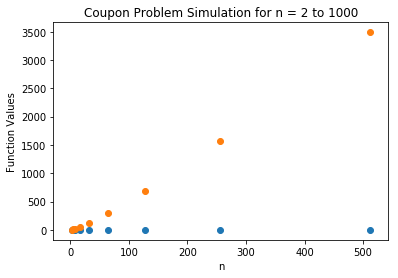

In [501]:
n = 2
n_max = 1000

harmon = []
dat = []
while n < n_max: 
    dat.append(coupon_sim(n))
    harmon.append((n, n*harmonic(n)))
    n = n * 2
    
harmon = np.array(harmon)
dat = np.array(dat)

data_n = dat[:,0]
data_sim = dat[:,1]

harmon_n = harmon[:,0]
harmon_data = harmon[:,1]

plt.scatter(data_n, data_sim)
plt.scatter(harmon_n, harmon_data)
plt.title("Coupon Problem Simulation for n = 2 to 1000")
plt.xlabel("n")
plt.ylabel("Function Values")
plt.show()